saved


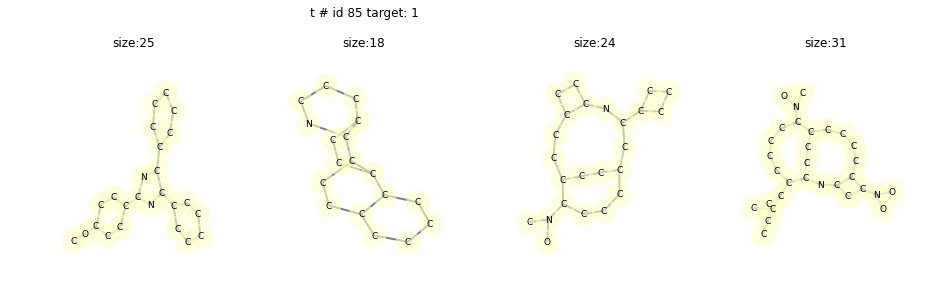

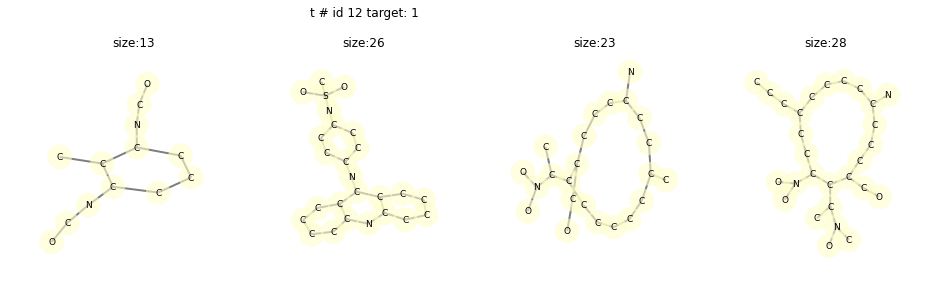

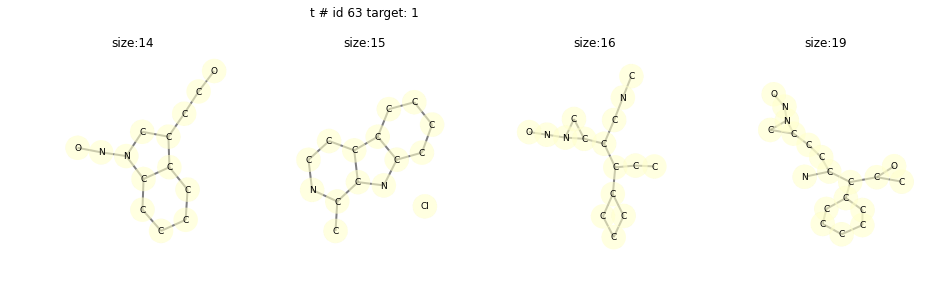

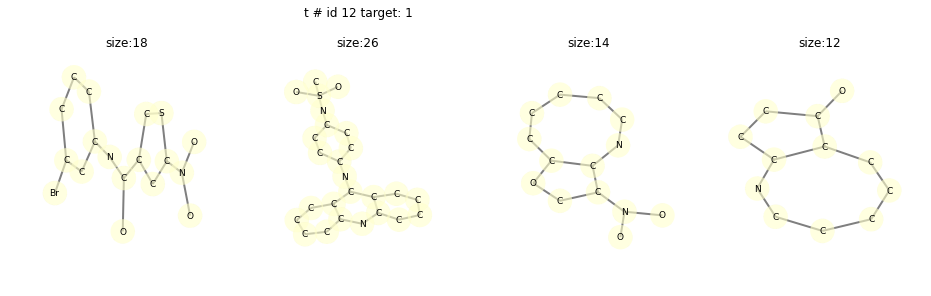

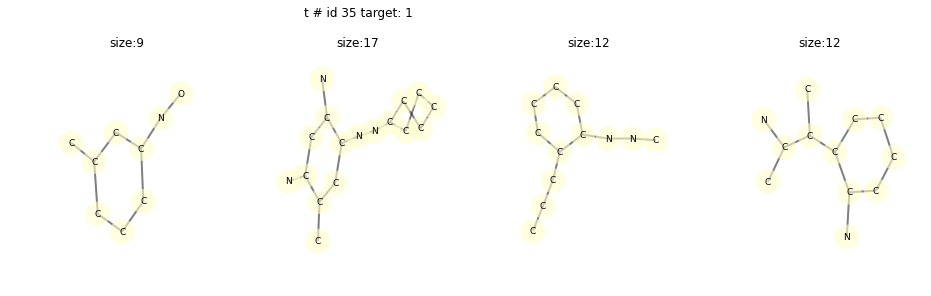

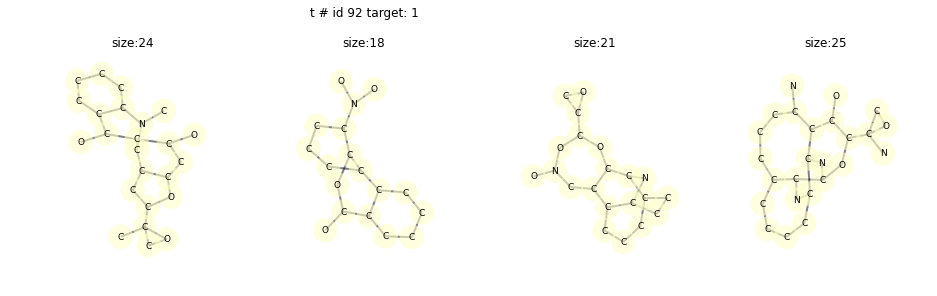

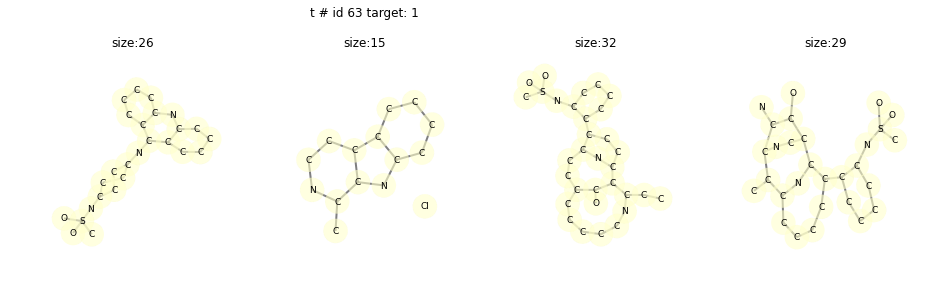

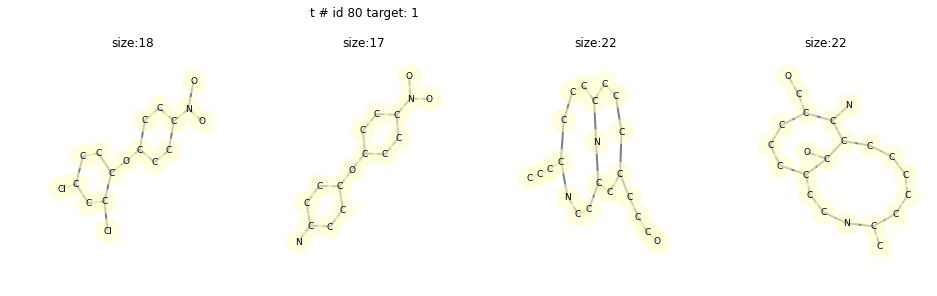

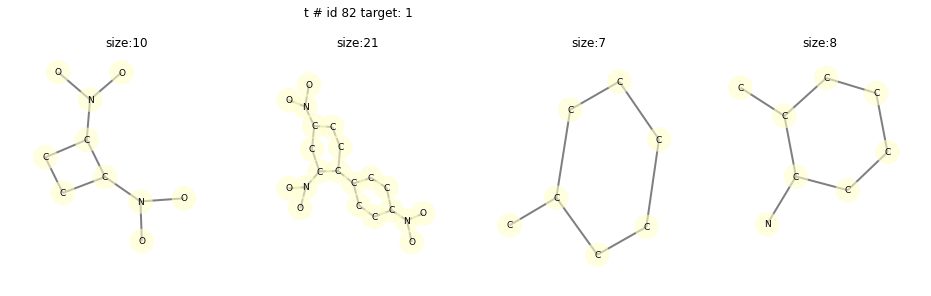

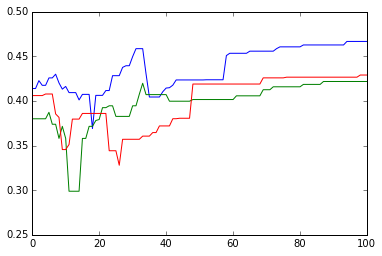

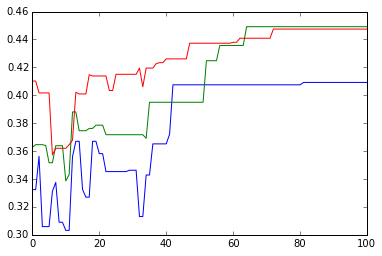

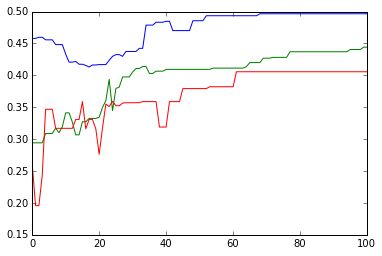

CPU times: user 35.8 s, sys: 517 ms, total: 36.4 s
Wall time: 38.1 s


In [2]:
%%time
'''
GOOD STUFF  lets test the clusterator
'''
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.cluster as cl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg
steps=100

#sampler=cl.cluster(vectorizer=eg.Vectorizer(  normalization=False, inner_normalization=False))
sampler= cl.cluster(thickness_list=[1])
food=gspan_to_eden( 'bursi.pos.gspan' )
food= itertools.islice(food,50)
sampler.fit(food,  n_jobs=1)
sampler.save('tmp/cluster.ge')
print 'saved'
#sampler.load('tmp/cluster.ge')

graphs = gspan_to_eden( 'bursi.pos.gspan' )
graphs = itertools.islice(graphs,50)
graphs = sampler.sample(graphs,
                        sampling_interval=int(steps/3)+1,
                        batch_size=1,
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        annealing_factor=2.0,
                        doXgraphs= 9
                        )


history=[]
for  i, gr in enumerate(graphs):
    history.append(gr.graph['sampling_info']['score_history'])
    
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'])


t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[6:]:
    plt.plot(t, h)
plt.show()